In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [54]:
data_set_conaminantes = pd.read_csv('../../data/processed/Dataset_Particulas_contaminantes.csv',sep=';', thousands=None, decimal=',')
data_set_conaminantes['fecha'] = pd.to_datetime(data_set_conaminantes['fecha'])
data_set_conaminantes


,fecha,pm2.5,pm10,humedad,puntoRocio,temperatura,dd_Valor,ff_Valor
0,2013-01-01,9.3612,25.2396,44.8462,10.0615,25.0308,174.6154,3.7692
1,2013-01-02,13.7865,36.1072,43.3077,12.1000,25.8000,256.1538,3.7692
2,2013-01-03,12.2568,29.2324,62.8462,13.4000,21.2462,213.0769,2.7692
3,2013-01-04,12.6945,33.1919,68.6923,13.5385,19.6000,154.6154,2.7692
4,2013-01-05,8.6662,26.3441,53.5385,12.3231,23.3231,235.3846,3.9231
...,...,...,...,...,...,...,...,...
3737,2023-03-27,18.5833,47.5000,53.8750,5.0792,15.8042,180.1250,3.7083
3738,2023-03-28,5.8125,23.0000,78.2500,8.4962,12.2885,155.5000,4.3846
3739,2023-03-29,5.3542,21.5000,63.3750,5.4625,13.4583,219.5000,6.9167
3740,2023-03-30,10.3333,32.0000,55.0417,2.6625,12.6625,216.6667,8.7083


In [55]:
fecha = data_set_conaminantes['fecha']
pm10 = data_set_conaminantes['pm10']
pm25= data_set_conaminantes['pm2.5']

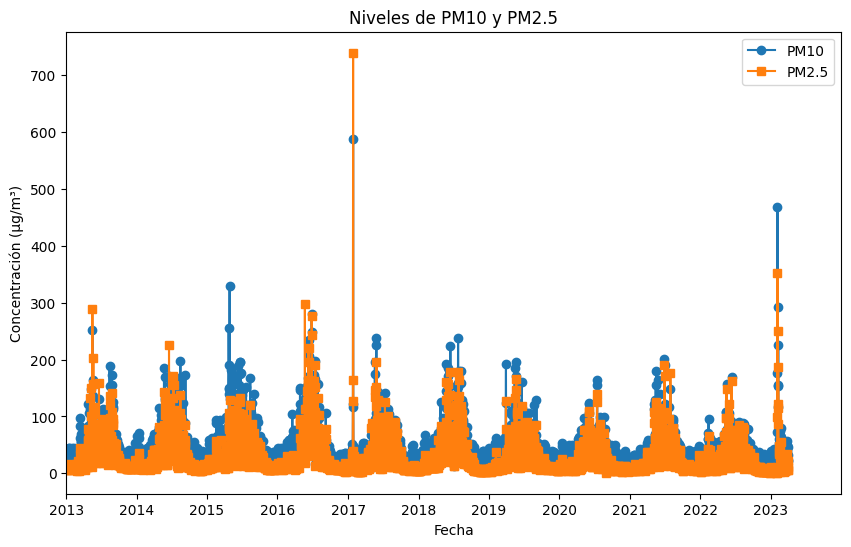

In [56]:
# Graficar los datos
plt.figure(figsize=(10,6))
plt.plot(fecha, pm10, label='PM10', marker='o')
plt.plot(fecha, pm25, label='PM2.5', marker='s')

plt.title('Niveles de PM10 y PM2.5')
plt.xlabel('Fecha')
plt.ylabel('Concentración (µg/m³)')
plt.legend()

# Configurar el formato y la ubicación de las marcas del eje x
ax = plt.gca()  # Obtener el eje actual
ax.xaxis.set_major_locator(mdates.YearLocator())  # Ubicar una marca por año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formatear las marcas como 'YYYY'

# Establecer los límites del eje x
plt.xlim([pd.Timestamp('2013-01-01'), pd.Timestamp('2023-12-31')])

plt.show()

c:\Users\benja\Documents\Particulas_contaminantes_chillan\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


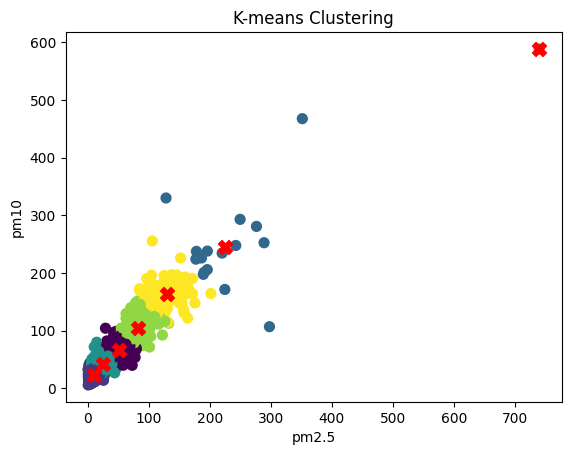

In [57]:
from sklearn.cluster import KMeans


# Preparar los datos para la imputación
X = data_set_conaminantes[['pm2.5', 'pm10']].values


kmeans = KMeans(n_clusters=7)

kmeans.fit(X)

# Obtener las etiquetas de los clusters y los centroides
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
 

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')


plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X')


plt.title('K-means Clustering')
plt.xlabel('pm2.5')
plt.ylabel('pm10')
plt.show()